<a href="https://colab.research.google.com/github/Fernanfds/Fernanfds/blob/main/Personalizando_Carteira_Acoes_Ibov_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance --upgrade--no-cahe-dir
import yfinance as yf


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --upgrade--no-cahe-dir


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import random

In [3]:
tickers_ibov = "ABEV3.SA PETR4.SA BBAS3.SA BBDC3.SA BBSE3.SA BPAC11.SA BRAP4.SA USIM5.SA CMIG4.SA"
dados_yahoo = yf.download(tickers=tickers_ibov, period='1y')["Adj Close"]

ibov = yf.download('BOVA11.SA' , period='1y')["Adj Close"]
ibov = ibov / ibov.iloc[0]

[*********************100%%**********************]  9 of 9 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
dados_yahoo.dropna(how='all' , inplace=True)
dados_yahoo.dropna(axis=1, inplace=True, thresh=250)

In [6]:
dados_yahoo

Ticker,ABEV3.SA,BBAS3.SA,BBDC3.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,CMIG4.SA,PETR4.SA,USIM5.SA
Date,,,,,,,,,
2023-03-28,13.865265,35.589970,10.850638,30.552494,18.774221,23.206696,9.915027,18.227161,6.514624
2023-03-29,14.074337,36.003479,10.973403,30.057940,18.617851,23.499331,10.096290,18.466688,6.514624
2023-03-30,14.083839,36.661335,11.266155,29.828978,19.409477,24.040258,10.286614,18.520775,6.972460
2023-03-31,13.618179,36.755314,11.190606,29.774027,19.204239,23.783094,10.368181,18.118988,6.953383
2023-04-03,13.618179,36.323006,10.935630,29.499273,19.194466,23.836300,10.495065,18.922560,6.858001
...,...,...,...,...,...,...,...,...,...
2024-03-22,12.410000,55.410000,12.520000,32.340000,36.689999,20.299999,12.280451,36.049999,10.150000
2024-03-25,12.230000,55.630001,12.470000,31.950001,36.919998,20.290001,12.369943,36.599998,9.970000
2024-03-26,12.410000,55.930000,12.630000,32.119999,37.290001,20.120001,12.399775,36.259998,9.930000


In [7]:
retorno = dados_yahoo.pct_change()
retorno

Ticker,ABEV3.SA,BBAS3.SA,BBDC3.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,CMIG4.SA,PETR4.SA,USIM5.SA
Date,,,,,,,,,
2023-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-29,0.015079,0.011619,0.011314,-0.016187,-0.008329,0.012610,0.018282,0.013141,0.000000
2023-03-30,0.000675,0.018272,0.026678,-0.007617,0.042520,0.023019,0.018851,0.002929,0.070278
2023-03-31,-0.033063,0.002563,-0.006706,-0.001842,-0.010574,-0.010697,0.007929,-0.021694,-0.002736
2023-04-03,0.000000,-0.011762,-0.022785,-0.009228,-0.000509,0.002237,0.012238,0.044350,-0.013717
...,...,...,...,...,...,...,...,...,...
2024-03-22,-0.015860,-0.004134,-0.018809,0.007163,-0.015562,-0.013605,0.024046,0.009804,-0.017425
2024-03-25,-0.014504,0.003970,-0.003994,-0.012059,0.006269,-0.000493,0.007287,0.015257,-0.017734
2024-03-26,0.014718,0.005393,0.012831,0.005321,0.010022,-0.008379,0.002412,-0.009290,-0.004012


In [8]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

Ticker,ABEV3.SA,BBAS3.SA,BBDC3.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,CMIG4.SA,PETR4.SA,USIM5.SA
Date,,,,,,,,,
2023-03-28,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2023-03-29,1.015079,1.011619,1.011314,0.983813,0.991671,1.012610,1.018282,1.013141,1.000000
2023-03-30,1.015764,1.030103,1.038294,0.976319,1.033837,1.035919,1.037477,1.016109,1.070278
2023-03-31,0.982180,1.032744,1.031332,0.974520,1.022905,1.024838,1.045704,0.994065,1.067350
2023-04-03,0.982180,1.020597,1.007833,0.965528,1.022384,1.027130,1.058501,1.038152,1.052709
...,...,...,...,...,...,...,...,...,...
2024-03-22,0.895042,1.556899,1.153849,1.058506,1.954275,0.874748,1.238570,1.977818,1.558033
2024-03-25,0.882060,1.563081,1.149241,1.045741,1.966526,0.874317,1.247596,2.007992,1.530403
2024-03-26,0.895042,1.571510,1.163987,1.051305,1.986234,0.866991,1.250604,1.989339,1.524263


In [14]:
carteira = random.choices(dados_yahoo.columns, k=5)
carteira = 10000 * retorno_acumulado.loc[: , carteira]
carteira['saldo'] = carteira.sum(axis=1)
carteira["retorno"] = carteira['saldo'].pct_change()
carteira

Ticker,PETR4.SA,BRAP4.SA,CMIG4.SA,ABEV3.SA,BPAC11.SA,saldo,retorno
Date,,,,,,,
2023-03-28,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000,NaN
2023-03-29,10131.411986,10126.099368,10182.816422,10150.788402,9916.710174,50507.826352,0.010157
2023-03-30,10161.085661,10359.190669,10374.772319,10157.641795,10338.365996,51391.056440,0.017487
2023-03-31,9940.652651,10248.376098,10457.038170,9821.795275,10229.046767,50696.908961,-0.013507
2023-04-03,10381.517624,10271.302882,10585.009088,9821.795275,10223.841089,51283.465959,0.011570
...,...,...,...,...,...,...,...
2024-03-22,19778.175236,8747.475136,12385.696213,8950.423914,19542.753761,69404.524260,-0.001309
2024-03-25,20079.922296,8743.166758,12475.955016,8820.602878,19665.261926,69784.908875,0.005481
2024-03-26,19893.387407,8669.912005,12506.042566,8950.423914,19862.342134,69882.108027,0.001393


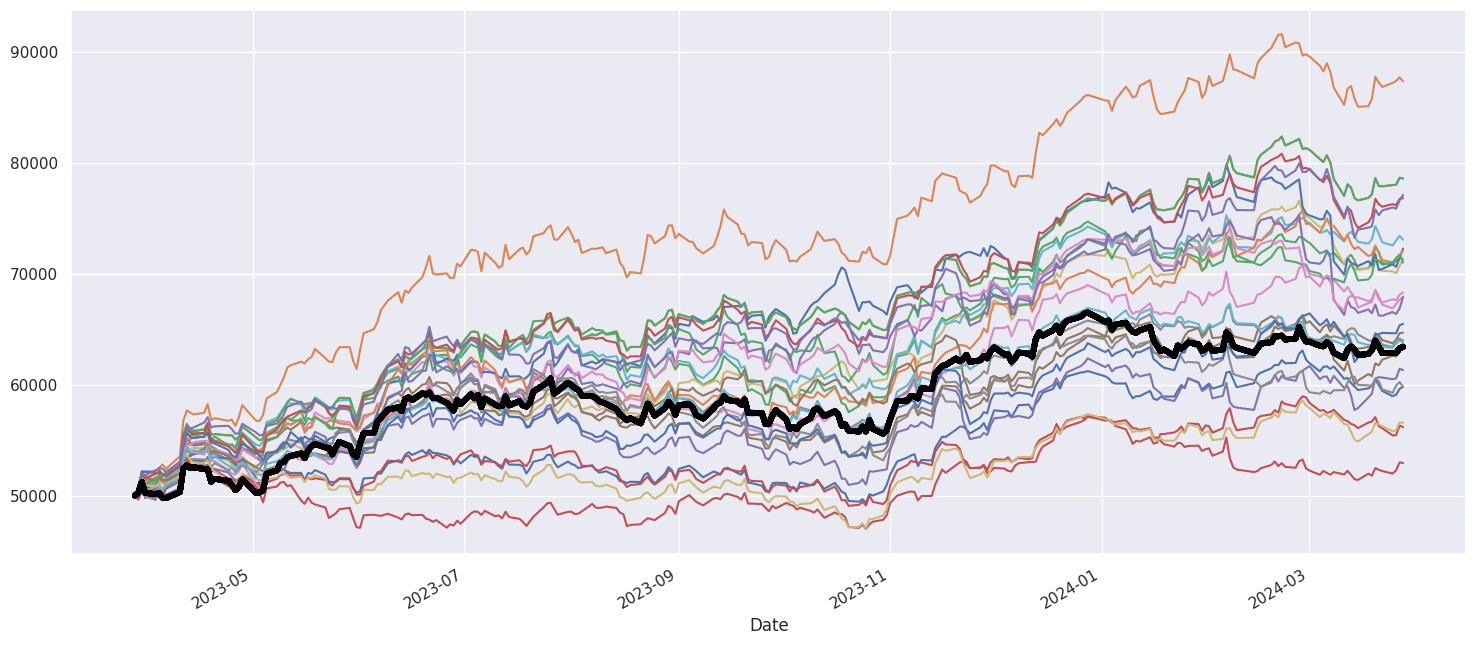

In [17]:
for i in range(25):
  carteira = random.choices(dados_yahoo.columns, k=5)
  carteira = 10000 * retorno_acumulado.loc[: , carteira]
  carteira['saldo'] = carteira.sum(axis=1)
  carteira['saldo'].plot(figsize=(18,8))

  (ibov*50000).plot(linewidth=4, color='black')
